# TBANLT 585 - Lab Assignment 01 - Introduction to Machine Learning Using Python!
In this lab you will work through a complete machine learning project, step by step, from start to finish. By the time you have completed this lab, you will have achieved all of the following learning objectives:
### Learning Objectives
* Train, test, and compare several machine learning models that solve an important, real-world problem.
* Use Python to load and familiarize yourself with a large, real-world dataset.
* Create visualizations to gain insights into variables and inter-variable relationships.
* Prepare data so that they can be used as input into machine learning algorithms.
* Gain experience working with Python and Google Colaboratory notebooks.

### Import Libraries
Run the code cell below to import all of the libraries that we'll need for this lab assignment.

In [1]:
#import all of the libraries that we'll need for this lab
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as sklm
import seaborn as sns
import warnings
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

### Load Data
All machine learning projects require data, so we'll begin by uploading our data file for this lab, and then loading our data into a *pandas dataframe*. If you are unfamiliar with pandas, then please read the following Wikipedia article: <a href="https://en.wikipedia.org/wiki/Pandas_(software)">https://en.wikipedia.org/wiki/Pandas_(software)</a>

Before continuing, be sure to upload the `Lab Assignment 01 - Data.csv` file into your Google Colab notebook's session storage by clicking on the *Files* (folder) icon in the upper-left corner of your screen, and then clicking on the *Upload to session storage* button.

#### Dataset Overview
The data for this lab are derived from the *Pima Indians Diabetes dataset*, which was published by the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset contains information about women who are members of the Pima people -- a group of Native Americans living in an area consisting of what is now central and southern Arizona. The dataset contains several diagnostic measurements for each woman, including whether each woman has diabetes.
#### Dataset Variables
The dataset contains the following variables:
* <u>Pregnancies</u>: The number of times a woman has been pregnant
* <u>Plasma_Glucose</u>: A measurement of a woman's plasma glucose concentration
* <u>Diastolic_Blood_Pressure</u>: A woman's diastolic blood pressure (in mm Hg)
* <u>Triceps_Thickness</u>: The thickness of a woman's triceps skin fold (in mm)
* <u>Serum_Insulin</u>: A woman's serum insulin level (in mu U/ml)
* <u>BMI</u>: A woman's body mass index (weight in kg/(height in m)<sup>2</sup>)
* <u>Diabetes_Pedigree</u>: The likelihood of a woman having diabetes based on her family history
* <u>Age</u>: A woman's age (in years)
* <u>Has_Diabetes</u>: Whether a woman has diabetes (0 = does not have diabetes, 1 = has diabetes)

Run the code cell below to load the diabetes data into a pandas dataframe.

In [2]:
#Load the diabetes data into a pandas dataframe named "df".
#"Patient_ID" is an attribute in the dataset whose values uniquely identify a woman. The "index_col" parameter
#tells Pandas to use Patient_ID as the index column in the dataframe. The index column serves the same purpose
#in a dataframe as a primary key in a relational database table.
df = pd.read_csv('Lab Assignment 01 - Data.csv', index_col='Patient_ID')

### Preview the Data
Read about the pandas dataframe `head` function [on this webpage](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).

**TASK 01:**
>Write a line of code in the cell below that will display the first 10 rows of data in the `df` dataframe.

**QUESTION 01:**
>What is the age of the 10th woman in the dataset (i.e., the woman with `Patient_ID` = 10)?

In [3]:
#display the first 10 rows of data in the dataframe
df.head(10)

,Pregnancies,Plasma_Glucose,Diastolic_Blood_Pressure,Triceps_Thickness,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Has_Diabetes
Patient_ID,,,,,,,,,
1,0,171,80,34,23,43.509726,1.213191,21,0
2,8,92,93,47,36,21.240576,0.158365,23,0
3,7,115,47,52,35,41.511523,0.079019,23,0
4,9,103,78,25,304,29.582192,1.282870,43,1
5,1,85,59,27,35,42.604536,0.549542,22,0
6,0,82,92,9,253,19.724160,0.103424,26,0
7,0,133,47,19,227,21.941357,0.174160,21,0
8,0,67,87,43,36,18.277723,0.236165,26,0
9,8,80,95,33,24,26.624929,0.443947,53,1


### Generate Descriptive Statistics
Read about the pandas dataframe `describe` function [on this webpage](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

**TASK 02:**
>Write a line of code in the cell below that will display descriptive statistics for all of the variables in the `df` dataframe.

**QUESTION 02:**
>What is the standard deviation of the `BMI` variable? Report three decimals of precision (e.g., 5.678).

In [5]:
#display descriptive statistics for all of the variables in the dataframe
df.describe()

,Pregnancies,Plasma_Glucose,Diastolic_Blood_Pressure,Triceps_Thickness,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Has_Diabetes
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


Notice that the dataset contains information about 15,000 women. This is not exactly "big data", but it certainly is not a small dataset either!
### Visualize the Distribution of Each Variable

**TASK 03:**
>Run the code cell below to visualize how the data for each variable in the dataset are distributed. I used nested `for` loops to create these figures because I'm lazy -- otherwise I would need to write instructions to create each of the nine figures individually!

**QUESTION 03:**
>How would you characterize the distribution of the `age` variable? Is it normally distributed, left skewed (i.e., negatively skewed), or right skewed (i.e., positively skewed)? If you're unsure, please read [this article about skewness](https://en.wikipedia.org/wiki/Skewness).

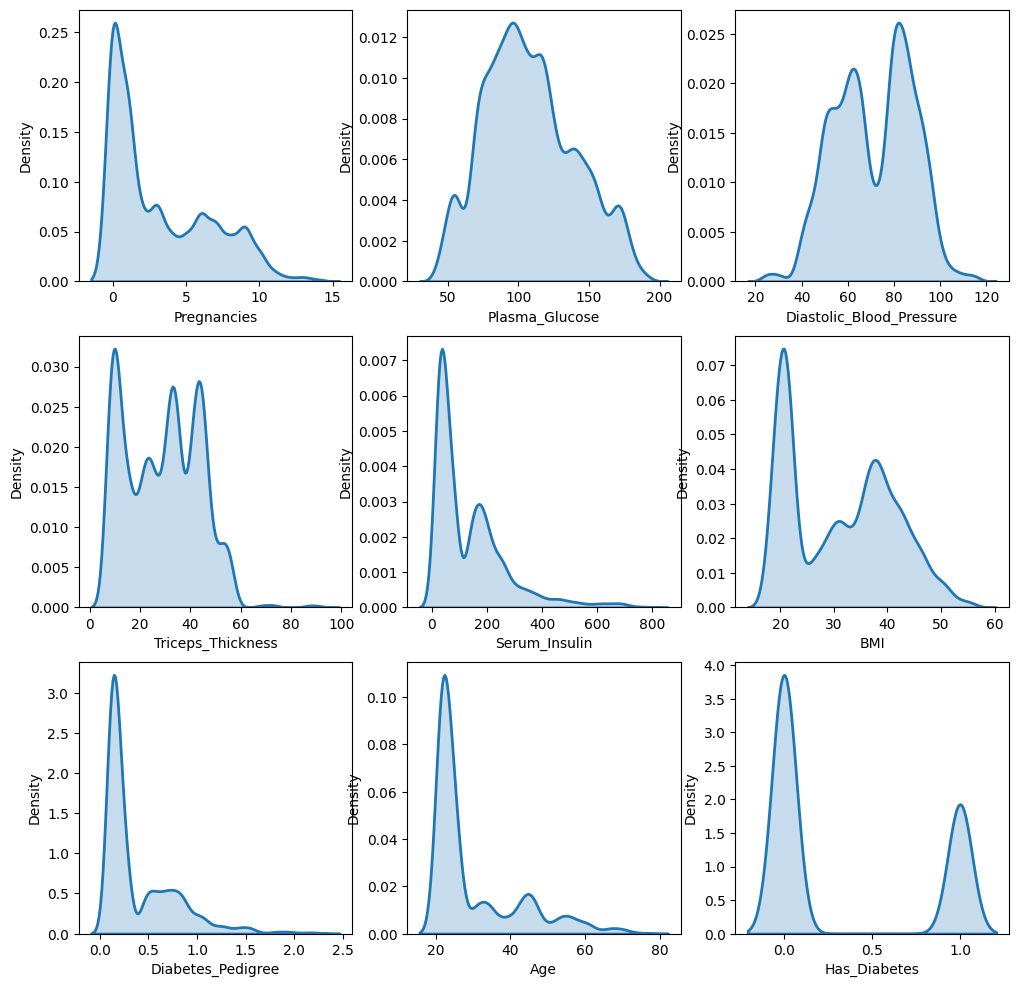

In [6]:
#generate kernel density estimate (KDE) plots for all nine variables in the dataset
rows, cols = 3, 3
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True, lw=2)
    df_col_index += 1

### Compare Distributions for Diabetic vs. Non-Diabetic Women
Since we're interested in creating a machine learning model that can predict whether or not a woman has diabetes, let's take a look at how the distributions of our predictor variables vary according to different values of the `Has_Diabetes` variable.

**TASK 04:**
>Run the code cell below to create box plots that show how the values of each predictor variable differ according to whether a woman has diabetes or not.

**QUESTION 04:**
>What can you conclude about the relationship between the number of times a woman has been pregnant and her likelihood of having diabetes? If you're unsure, please read [this article about box plots](https://en.wikipedia.org/wiki/Box_plot)

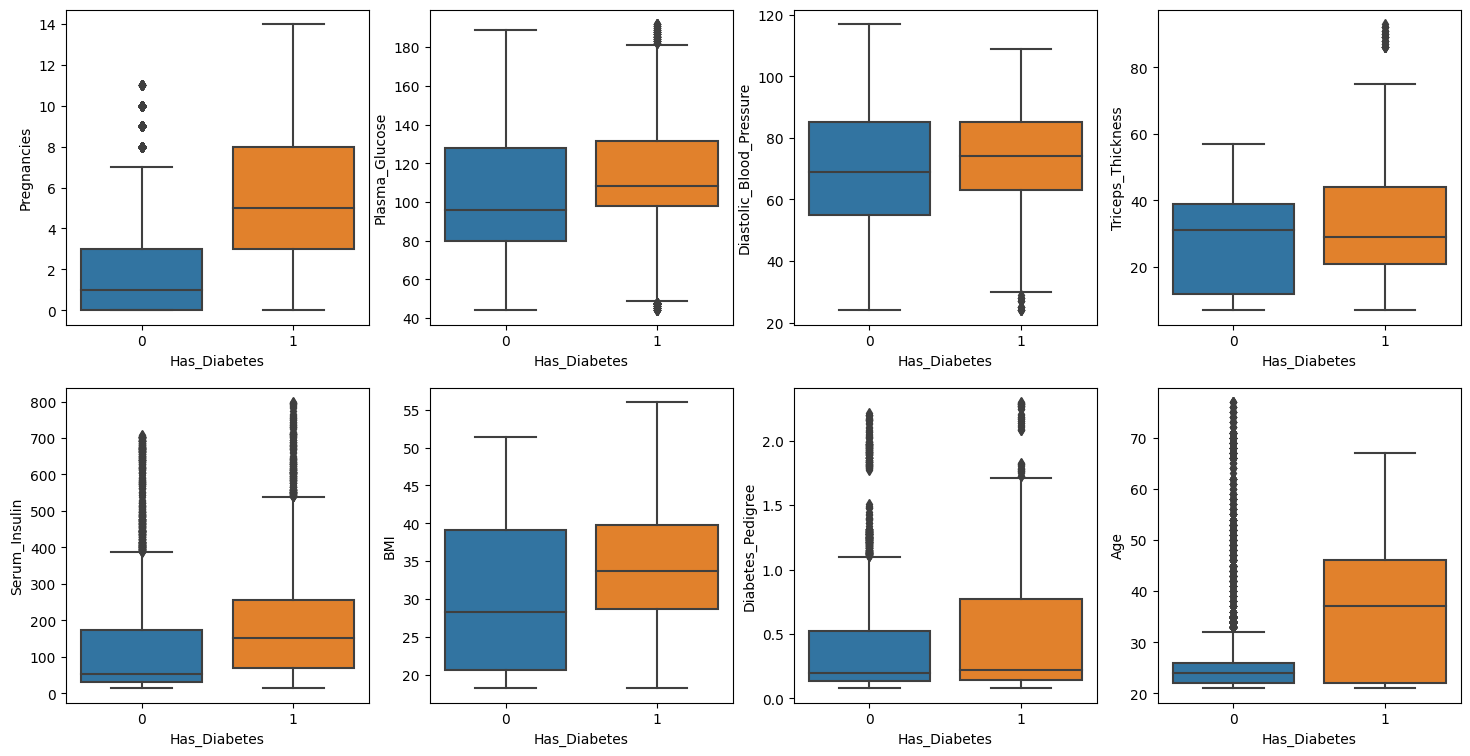

In [7]:
#generate box plots that show how the distribution of each predictor variable differs
#according to whether a woman has diabetes or not
rows, cols = 2, 4
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(18,9))
for row in range(rows):
  for col in range(cols):
    sns.boxplot(x='Has_Diabetes', y=df.columns[df_col_index], data=df, ax=ax[row, col])
    df_col_index += 1

### Correlations Among Variables
Examining a correlation matrix is a quick and useful way of familiarizing yourself with the relationships among your variables. Read about the pandas dataframe `corr` function [on this webpage](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

**TASK 05:**
>Write a line of code in the cell below that will display a (pearson) correlation matrix for all of the variables in the dataset.

**QUESTION 05:**
>Which three variables are the most strongly correlated with whether or not a woman has diabetes? If you're unsure or if you need a reminder about how to interpret correlation coefficients, please read [this article about correlations](https://en.wikipedia.org/wiki/Correlation_and_dependence).

In [ ]:
#display a correlation matrix for all of the variables in the dataset


### Correlation Matrix Heatmap
A correlation matrix heatmap uses colors of varying intensities to visually depict the strength and direction of the relationships among a set of variables.

Run the code cell below to draw a correlation matrix heatmap for our diabetes dataset.
* Note that only one of the correlations is negative; i.e., with only one exception, each variable is positively related to all of the other variables.
* Note also that most of the relationships are quite weak (i.e., most of the correlations are near zero).

<Axes: >

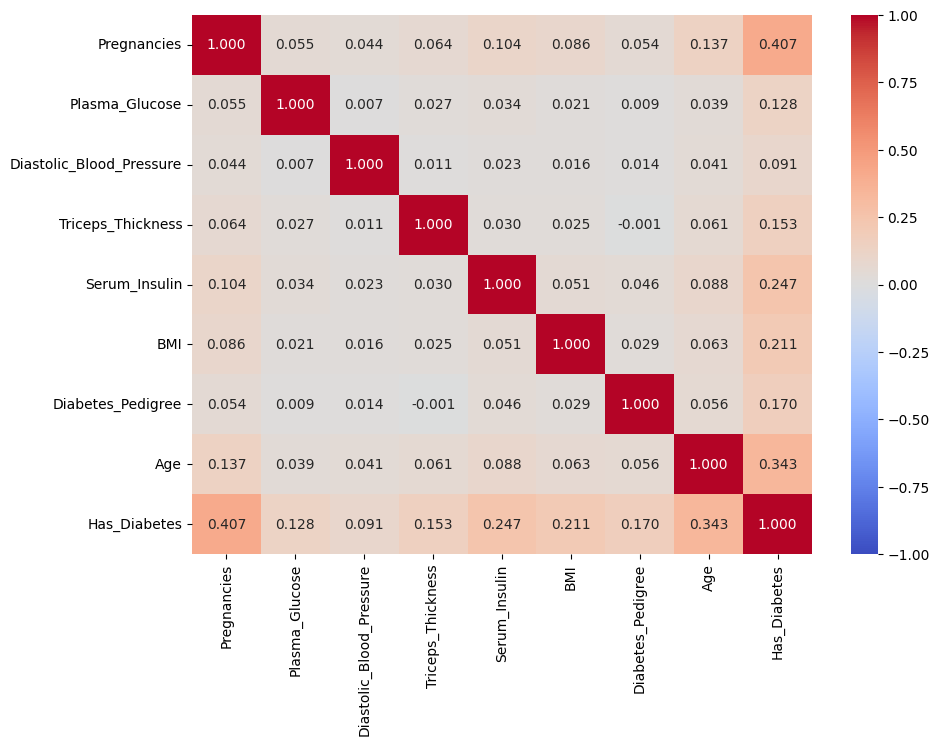

In [8]:
#draw a correlation matrix heatmap
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

## Prepare Data
Now that we're familiar with our dataset, we can work on getting the data ready to be used for training and testing our machine learning models. This is already a relatively "clean" dataset, so we won't need to worry about issues such as missing values, recoding variables, etc. Instead, we'll just need to transform a few skewed variables, rescale the predictor variables, and then split the data into training and testing sets.
### Transform Skewed Variables
Earlier in this lab we looked at distribution (KDE) plots for all of the variables in the dataset. These plots revealed that several of the variables have skewed distributions. Based on the direction of the skew, we can apply a **natural log transformation** to these variables in order to make their relationships with other variables more linear. Note that if the variables were skewed in the opposite direction, then we could first compute a "mirror image" version of the relevant variables, and then apply the transformation.

***Why should we transform skewed variables?*** Because many machine learning algorithms work best when the relationships among the variables are as linear as possible!

Applying a transformation to a skewed variable will rarely make its distribution perfectly normal, but it can help to make the distribution *more normal*, and this is often sufficient to improve the performance of a machine learning model.

Run the code cell below to apply a natural log transformation to the `Pregnancies`, `Serum_Insulin`, `BMI`, `Diabetes_Pedigree`, and `Age` variables, and to see the effect of applying the natural log transformation to the `Serum_Insulin` variable. A dashed red line showing a true normal distribution will also appear in the figure as a basis of comparison.

Note that the transformation applied to the `Pregnancies` variable is  $log(x + 1)$. This is because many of the women in the dataset have zero pregnancies, and  $log(0)$ is undefined. If you're interested, this technique is called *Laplace Smoothing*.

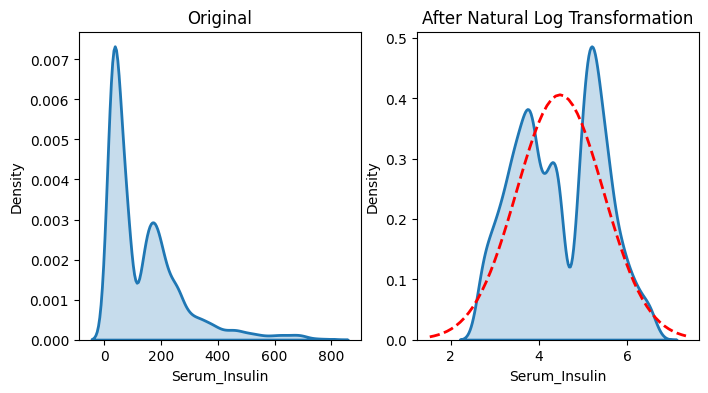

In [9]:
#apply natural log transformations to skewed variables
df['Pregnancies'] = [math.log(x + 1) for x in df['Pregnancies']]
serum_insulin_original = df['Serum_Insulin'].copy() #save a copy of the original (untransformed) serum insulin levels
df['Serum_Insulin'] = [math.log(x) for x in df['Serum_Insulin']]
df['BMI'] = [math.log(x) for x in df['BMI']]
df['Diabetes_Pedigree'] = [math.log(x) for x in df['Diabetes_Pedigree']]
df['Age'] = [math.log(x) for x in df['Age']]

#get values for plotting a normal distribution for the transformed "Serum_Insulin" variable
mean, std = df.Serum_Insulin.mean(), df.Serum_Insulin.std()
x = np.arange(mean - (3 * std), mean + (3 * std), std / 10)

#plot the untransformed and transformed distributions for the "Serum_Insulin" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(serum_insulin_original, ax=ax[0], fill=True, lw=2)
sns.lineplot(x=x, y=norm.pdf(x, mean, std), ax=ax[1], lw=2, color='r', linestyle='--')
sns.kdeplot(df.Serum_Insulin, ax=ax[1], fill=True, lw=2)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')

As you can see, the natural log transformation made the shape of the distribution for the `Serum_Insulin` variable much more normal.
### Rescaling Predictor Variables
A key objective in this lab is to train a machine learning model to accurately predict whether a woman has diabetes. For our dataset, this means that `Has_Diabetes` is the outcome variable. In machine learning, outcome variables are often referred to as *labels*. All of the other variables in our dataset will serve as predictors; i.e., the machine learning models will try to learn to predict if a woman has diabetes based on the values of these predictor variables. In machine learning, predictor variables are often referred to as *features*.

Our next data preparation task is to rescale all of our features. In this case, we will use a min-max scaler to rescale the values of each feature / predictor variable to the range 0 to 1.

***Why should we rescale our numeric features?*** Because many machine learning algorithms are sensitive to different ranges of values among predictor variables! Variables that contain large values, for example, might be given more "weight" or influence by the machine learning algorithm during the training process. We can avoid this problem by ensuring that all of the features use the same scale.

Run the code cell below to rescale all of the predictor variables to a range of 0 to 1.

In [10]:
#define a min-max scaler and rescale all predictor variables to the range 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
predictors = ['Pregnancies', 'Plasma_Glucose', 'Diastolic_Blood_Pressure', 'Triceps_Thickness', 'Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age']
df[predictors] = scaler.fit_transform(df[predictors])

**TASK 06:**
>Write a line of code in the cell below that will display descriptive statistics for all of the rescaled predictor variables in the dataframe. Note that all of the features now have a minimum of 0.0 and a maximum of 1.0.

**QUESTION 06:**
>What is the median of the rescaled `Plasma_Glucose` variable? Report three decimals of precision (e.g., 0.123). Just in case you've forgotten, *2nd quartile* and *50th percentile* are other names for the median!

In [14]:
#show descriptive statistics for all of the rescaled predictor variables.
df[predictors].describe()

,Pregnancies,Plasma_Glucose,Diastolic_Blood_Pressure,Triceps_Thickness,Serum_Insulin,BMI,Diabetes_Pedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.400145,0.431465,0.507749,0.253651,0.454235,0.443611,0.369475,0.228715
std,0.322468,0.216094,0.180201,0.169253,0.242906,0.284409,0.251386,0.260623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.270270,0.365591,0.093023,0.253320,0.138168,0.167880,0.035804
50%,0.405684,0.405405,0.516129,0.279070,0.440072,0.495329,0.278519,0.102773
75%,0.718565,0.574324,0.655914,0.395349,0.651272,0.683624,0.610634,0.393160
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split the Data into Training and Testing Sets
Our final data preparation task is to split our data into training and testing sets. The basic idea is that we want to use the training data to teach the machine learning models to predict whether a woman has diabetes. We can then evaluate how well those models are likely to work in the real world by testing how accurate their predictions are *for women they haven't seen before* (i.e., for the women in the testing set). Note that we could use a more sophisticated technique for this purpose (such as *k-fold cross validation*), but for now, we'll keep things simple.

***The difference between how accurate the machine learning model's predictions are on the training vs. testing sets will tell us something very important:***
* Ideally, we want the predictive accuracy to be high for both the training and testing sets -- this indicates that the machine learning model has accurately learned to solve the underlying problem.
* If there is a large difference between how well the model works for the training vs. testing data, then it is likely that the model is *overfitted* to the training data -- this indicates that the machine learning algorithm has focused too specifically on the training data that it was given, and has not identified a more general solution to the underlying problem. For more information about this phenomenon, please feel free to read [this article on overfitting](https://en.wikipedia.org/wiki/Overfitting).

Run the code cell below to split the diabetes data into separate training and testing sets. The training data will be stored in a dataframe named `df_train`, while the testing data will be stored in a dataframe named `df_test`.

In [15]:
#split the data into training and testing sets
df_train, df_test = train_test_split(df.copy(), train_size=0.7, shuffle=True, random_state=42)

**TASK 07:**
>Write two lines of code that will tell you (1) how many rows of data are in the training dataframe, and (2) how many rows of data are in the testing dataframe.

**QUESTION 07:**
>How many rows of data are in the testing set?

In [17]:
#display the number of rows in the training set
print(len(df_train))

#display the number of rows in the testing set
print(len(df_test))

10500
4500


## Train and Test the Machine Learning Models
Now that our data have been fully prepared, we're finally ready to train and test a few machine learning models!
### Logistic Regression Classifier
The first machine learning model that we'll build is a *logistic regression classifier*. This type of model relies on the ubiquitous regression framework to predict the probability of a woman having diabetes.

You may learn more about logistic regression by [reading this article](https://en.wikipedia.org/wiki/Logistic_regression).

Run the code cell below to train a logistic regression classifier. Note that the model is being trained with our training set.

In [18]:
#train a logistic regression classifier
model = LogisticRegression(random_state=42)
model.fit(df_train[predictors], df_train.Has_Diabetes)

LogisticRegression(random_state=42)

Now that our logistic regression classifier has been trained, it's time to evaluate how well it performs using our testing set.

Run the code cell below to generate and view the model's predictions about whether the women in the testing set have diabetes.

In [19]:
#generate predictions, and save them in a new column named "Has_Diabetes_Predicted" in the testing dataframe
df_test['Has_Diabetes_Predicted'] = model.predict(df_test[predictors])

#view actual and predicted values for the first 20 women in the testing set
df_test[['Has_Diabetes', 'Has_Diabetes_Predicted']].head(20)

,Has_Diabetes,Has_Diabetes_Predicted
Patient_ID,,
11500,0,0
6476,1,0
13168,0,0
863,0,0
5971,0,0
6707,0,0
3018,1,1
3782,0,0
3899,0,1


As you can see, the logistic regression classifier is able to accurately predict whether most of the women in the testing set have diabetes or not, but it does make several mistakes.

Let's take a closer look at how well our logistic regression classifier performs. The most common way to evaluate the performance of a classifier is to use a **confusion matrix**. A confusion matrix displays the number of correctly and incorrectly classified cases in a table, as shown below:

| | Predicted Negative | Predicted Positive |  
|------|:------:|:------:| 
|**Actual Negative**| True Negative | False Positive (Type I error) |  
|**Actual Positive** | False Negative (Type II error) | True Positive |

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases with positive labels (*1s*) that have been correctly classified as positive.     
**True Negative** or **TN** are cases with negative labels (*0s*) that have been correctly classified as negative.  
**False Positive** or **FP** are cases with negative labels that have been incorrectly classified as positive.   
**False Negative** or **FN** are cases with positive labels that have been incorrectly classified as negative.

Additional performance metrice include:

**Accuracy**: Accuracy is the percentage of all cases that were correctly predicted.

**Precision**: Precision is the number of correctly predicted cases for the label value divided by all of the cases in the column.

**Recall**: Recall is the percentage of cases of a label value that were correctly predicted out of all cases that actually have that label value.

**F1**: The F1 statistic is weighted average of precision and recall. Put differently, F1 is a weighted metric for overall model performance.


**TASK 08:**
>Run the code cell below to view a confusion matrix and other performance metrics for our logistic regression classifier.

**QUESTION 08:**
>What is the overall accuracy for the logistic regression classifier? Report three decimals of precision (e.g., 0.876).

In [20]:
#define a function that prints a confusion matrix and other performance metrics
def print_metrics(actual, predicted):
  tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
  total_predictions = tn + fp + fn + tp
  print(' True positive: {} ({:.2f}%)'.format(tp, tp / total_predictions * 100))
  print(' True negative: {} ({:.2f}%)'.format(tn, tn / total_predictions * 100))
  print('False positive: {} ({:.2f}%)'.format(fp, fp / total_predictions * 100))
  print('False negative: {} ({:.2f}%)\n'.format(fn, fn / total_predictions * 100))
  target_names=['does not have diabetes', 'has diabetes']
  print(classification_report(actual, predicted, target_names=target_names, digits=4))

#show the performance of the model on the testing data
print_metrics(df_test.Has_Diabetes, df_test.Has_Diabetes_Predicted)

 True positive: 1006 (22.36%)
 True negative: 2661 (59.13%)
False positive: 344 (7.64%)
False negative: 489 (10.87%)

                        precision    recall  f1-score   support

does not have diabetes     0.8448    0.8855    0.8647      3005
          has diabetes     0.7452    0.6729    0.7072      1495

              accuracy                         0.8149      4500
             macro avg     0.7950    0.7792    0.7859      4500
          weighted avg     0.8117    0.8149    0.8124      4500



Although the logistic regression classifier is reasonably accurate overall, the values shown in the confusion matrix are troubling. Specifically, the false positive rate and particularly the false negative rate are quite large. 

***Think about what this means in the context of a disease prediction scenario.***
* In our scenario, a **false positive** could lead a doctor to tell a patient that she has diabetes when she actually does not. This is obviously a bad situation. Not only will the patient suffer needless psychological stress, but she may also be subjected to additional unnecessary tests or required to take unnecessary medications.
* A **false negative** in our scenario, however, would be *really, really bad* because it might lead a doctor to tell a patient that she does not have diabetes when she actually does have the disease. This could be life threatening! The recall metric shows that only about 67% of the women who actually have diabetes were correctly labeled as having diabetes. **This means that about 33% of the women who actually have diabetes were incorrectly labeled as not having diabetes.** Given how dangerous this could be, our logistic regression classifier is obviously not well-suited for real-world use.

### ROC Curves
A very useful graphical technique for evaluating the performance of a machine learning classifier model is to generate a receiver operating characteristic (ROC) curve. A ROC curve shows the relationship between a model's true positive rate and its false positive rate. Consider that when our model predicts that a woman has diabetes, the prediction is either correct (true positive) or incorrect (false positive). Therefore:
* The best performing classifier model is the one with the highest true positive rate and the lowest false positive rate. ROC curves for models with these characteristics approach very closely to the upper-left corner of the diagram.
* Models that have a poor ratio of true positive predictions to false positive predictions will have ROC curves that are closer to an upward slanting line that extends from the lower-left of the diagram to the upper-right of the diagram.
* Thus, as the performance of a model improves, the area under the curve (AUC) increases. As such, the area under the ROC curve is an excellent measure of the usefulness of a machine learning classifier model in general, where a greater area indicates a more useful model. ***Comparing the AUCs of different models is therefore an excellent way of deciding which classifier model is best!***

**TASK 09:**
>Run the code cell below to generate a ROC curve for our logistic regression classifier.

**QUESTION 09:**
>What is the area under the ROC curve for the logistic regression classifier? Report three decimals of precision (e.g., 0.789).

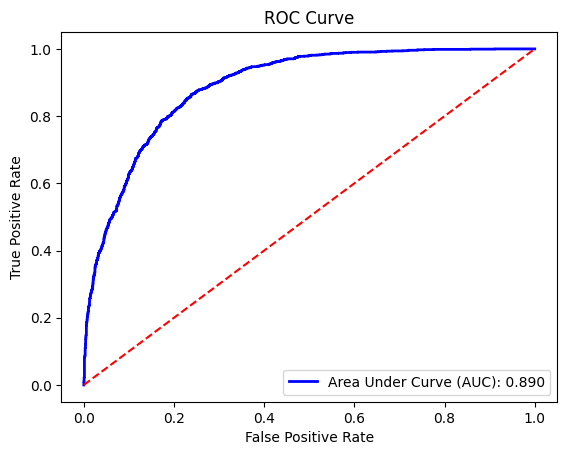

In [21]:
#define a function that generates a ROC curve
def generate_roc_curve(actual, predicted_probabilities):
  fpr, tpr, _ = roc_curve(actual, predicted_probabilities)
  auc = roc_auc_score(actual, predicted_probabilities)
  plt.plot(fpr, tpr, 'b-', lw=2, label='Area Under Curve (AUC): {0:.3f}'.format(auc))
  plt.plot([0, 1], [0, 1], 'r--')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.show()

#compute predicted probabilities that each woman in the testing set has diabetes
predicted_probabilities = model.predict_proba(df_test[predictors])[::,1]

#generate a ROC curve for the logistic regression classifier
generate_roc_curve(df_test.Has_Diabetes, predicted_probabilities)

The blue line in the diagram shows the trade-off between the true positive rate and the false positive rate for the logistic regression classfier, while the dashed red line represents a hypothetical "unskilled" model that has learned nothing from the data. Ideally, we want our models to have a very high true positive rate and a very low false positive rate. This means that the closer the ROC curve (i.e., the blue line) is to the upper-left corner of the diagram, the better the model is, and the larger the area under the curve (AUC) will be. Comparing the AUCs for ROC curves from two or more classifier models can therefore help us to identify the superior model.
### K-Nearest Neighbors (KNN) Classifier
Since our logistic regression classifier has some problems, let's see if we can acheive better results by using a k-nearest neighbors (KNN) classifier. This type of classifier uses a simple majority voting approach in which each unknown case is classified based on the categories of the *k* nearest known cases.

To learn more about how KNN classification works, please [read this article](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

**TASK 10:**
>Run the code cell below to train our KNN classifier and view its resulting confusion matrix and other performance metrics.

**QUESTION 10:**
>What is the overall accuracy for the KNN classifier? Report three decimals of precision (e.g., 0.852).

In [22]:
#train a k-nearest neighbors (KNN) classifier
model = KNeighborsClassifier(n_neighbors=11)
model.fit(df_train[predictors], df_train.Has_Diabetes)

#evaluate the performance of the KNN classifier using the test set
df_test['Has_Diabetes_Predicted'] = model.predict(df_test[predictors])

#show the performance of the model on the testing data
print_metrics(df_test.Has_Diabetes, df_test.Has_Diabetes_Predicted)

 True positive: 1233 (27.40%)
 True negative: 2792 (62.04%)
False positive: 213 (4.73%)
False negative: 262 (5.82%)

                        precision    recall  f1-score   support

does not have diabetes     0.9142    0.9291    0.9216      3005
          has diabetes     0.8527    0.8247    0.8385      1495

              accuracy                         0.8944      4500
             macro avg     0.8835    0.8769    0.8800      4500
          weighted avg     0.8938    0.8944    0.8940      4500



The KNN classifier is more accurate than our logistic regression classifier. Among women who actually have diabetes, the KNN classifier also has a much lower false negative rate of about 18% (compared to a false negative rate of about 33% with the logistic regression classifier).

Now let's take a look at the ROC curve for the KNN classifier.

**TASK 11:**
>Run the code cell below to generate a ROC curve for our KNN classifier.

**QUESTION 11:**
>What is the area under the ROC curve for the KNN classifier? Report three decimals of precision (e.g., 0.987).

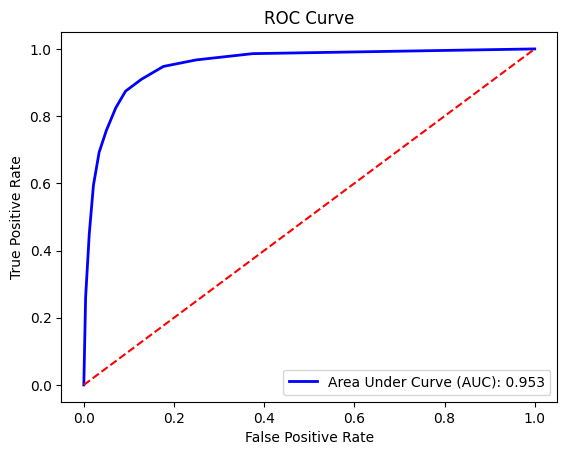

In [23]:
#compute predicted probabilities that each woman in the testing set has diabetes
predicted_probabilities = model.predict_proba(df_test[predictors])[::,1]

#generate a ROC curve for the KNN classifier
generate_roc_curve(df_test.Has_Diabetes, predicted_probabilities)

As you can see, the ROC curve for the k-nearest neighbors classifier is much closer to the upper-left corner of the diagram than the logistic regression classifier, and the area under the KNN classifier's ROC curve is also larger that that of the logistic regression classifier. We can therefore conclude that the KNN classifier is substantially better at predicting whether a woman has diabetes than the logistic regression model, at least among women who belong to the Pima people.

### Know Your Performance Baseline!
Finally, it is always important to know the appropriate baseline against which to compare your model's performance. The descriptive statistics that we generated at the beginning of this lab show that exactly one-third (33.33%) of the women in the dataset actually have diabetes. ***This means that without doing anything, we could simply guess that a woman in the dataset does not have diabetes, and we would be correct 66.667% of the time.*** The correct performance baseline for this scenario is thus 66.67% -- any machine learning model whose predictive accuracy is at or below this threshold is basically worthless!

### BONUS: Neural Network Classifier
Just for fun (and since a big part of this class focuses on artificial intelligence!), let's see how well a simple, deep neural network would perform at predicting whether a woman has diabetes.

Run the code cell below to train a simple, deep neural network classifier and view its resulting confusion matrix and other performance metrics. 

***Note:*** Training the neural network will take some time (approximately 75 seconds), so be patient!

In [24]:
#import the neural network classifier library
from sklearn.neural_network import MLPClassifier

#define and train the neural network
model = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(256, 128, 64, 32, 16), 
                      learning_rate='adaptive', early_stopping=False)
model.fit(df_train[predictors], df_train.Has_Diabetes)

#evaluate the performance of the neural network using the test set
df_test['Has_Diabetes_Predicted'] = model.predict(df_test[predictors])

#show the performance of the model on the testing data
print_metrics(df_test.Has_Diabetes, df_test.Has_Diabetes_Predicted)

 True positive: 1348 (29.96%)
 True negative: 2749 (61.09%)
False positive: 256 (5.69%)
False negative: 147 (3.27%)

                        precision    recall  f1-score   support

does not have diabetes     0.9492    0.9148    0.9317      3005
          has diabetes     0.8404    0.9017    0.8700      1495

              accuracy                         0.9104      4500
             macro avg     0.8948    0.9082    0.9008      4500
          weighted avg     0.9131    0.9104    0.9112      4500



As you can see, the neural network's predictions are more accurate than the other machine learning algorithms that we tried in this lab assignment. Importantly, among women who actually have diabetes, the neural network's false negative rate (as indicated by the recall value) is only about 9.8%, which is nearly twice as good as our next best model. This means that almost every woman who actually has diabetes would be correctly diagnosed by our neural network using just the simple set of predictors in our dataset.

## End of Lab Assignment 01!

***Note:*** I would suggest selecting *Runtime* from the menu, and tehn selecting *Restart and run all* before completing your lab quiz. This will ensure that you have a complete, clean run of your notebook to use as the basis for answering the questions on the lab quiz.